# Group Work Submission 1: PCA & Lasso

**Financial Products**

What is an Exchange-Traded Fund (ETF)?

* ETFs are basically a basket of securities traded on Stock Exchanges.

* It`s a security which tracks an Index like S&P 500, sector like Financials, commodity like oil, or other financial insutuments such as bonds.
* ETFs are listed and can be traded on Stock Exchanges.

**Data Importing**

Import the data from the csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from matplotlib import dates
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RepeatedKFold
import math
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

**Financial Products**

What is an Exchange-Traded Fund (ETF)?

* ETFs are basically a basket of securities traded on Stock Exchanges.

* It`s a security which tracks an Index like S&P 500, sector like Financials, commodity like oil, or other financial insutuments such as bonds.

* ETFs are listed and can be traded on Stock Exchanges.

Pick 1 of the funds in the data set, and find the weightings. Show in Python table:

In [2]:
MSCI_USA_weightings = pd.read_excel("MSCI USA.xlsx")
MSCI_USA_weightings

,Full name,Weight
0,APPLE ORD,0.059352
1,MICROSOFT ORD,0.053448
2,AMAZON COM ORD,0.037995
3,ALPHABET CL A ORD,0.020880
4,ALPHABET CL C ORD,0.020263
...,...,...
620,DISCOVERY SRS A ORD,0.000103
621,LIBERTY BROADBAND SRS A ORD,0.000102
622,LIBRTY MEDIA LRTY SIRIUSXM SRS A ORD,0.000100
623,OAK STREET HEALTH ORD,0.000097


In [3]:
df = pd.read_csv('MScFE 650 MLF GWP Data.csv', index_col=0) 
df

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,988.345,1450.64,2252.2500,1166.97,84.95,64.63,1424.53,2018.62,94.77,11122.05,...,2570.43,1162.66,554.53,1328.1400,1238.65,78.45,14099.14,1362.07,1641.51,3191.72
2-Oct-20,1037.211,1506.32,2265.7000,1128.45,84.89,66.00,1365.07,2031.76,97.19,11389.27,...,2587.30,1172.45,543.08,1344.0300,1276.25,79.97,14355.01,1368.78,1658.14,3243.91
9-Oct-20,1075.670,1617.45,2214.3200,1187.29,90.01,69.35,1447.85,2076.53,101.03,11779.71,...,2635.08,1212.32,553.32,1358.9700,1291.47,82.44,14602.91,1375.90,1687.56,3370.62


**1-Dimensional Data Summaries**

Summarize the min, max, mean, median, and standard deviation of each column

In [4]:
df_summ = df.describe(percentiles=[])

In [5]:
df_summaries = df_summ.drop(['50%'], axis=0)
df_summaries

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1457.231905,2526.652262,3029.482978,1183.940159,127.418889,91.290238,1813.989167,1970.821627,76.788214,8447.657738,...,2720.597183,1460.507817,595.207738,1618.220755,1348.088135,106.673413,12385.389048,1208.081468,2013.187579,2526.448532
std,238.611226,899.378857,516.678825,101.261295,24.770889,12.106033,354.986912,143.502890,13.192648,978.216958,...,292.192348,284.660584,92.229158,157.305041,93.417184,12.367770,1101.073211,113.761591,181.105639,382.318512
min,871.500000,844.090000,1722.870000,957.150000,78.290000,57.440000,879.170000,1503.010000,48.160000,6671.370000,...,2049.320000,720.230000,344.450000,1263.900000,942.480000,76.340000,9901.400000,1001.930000,1484.410000,1768.520000
max,1812.010000,4467.410000,3750.865500,1431.460000,177.580000,107.340000,2404.740000,2261.280000,103.540000,11852.360000,...,3217.240000,1892.670000,852.930000,1920.630000,1591.700000,128.220000,14989.150000,1484.520000,2255.520000,3386.440000


**Data Visualizing**

Write a Python function that graphs 1 time series with appropriate time labels

In [6]:
def plot_onetime(Plot1, title, xlabel, ylabel):
    Plot1.plot(figsize=(12,4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    return plt.tick_params(axis='x', labelsize=8)

Plotting an Example:

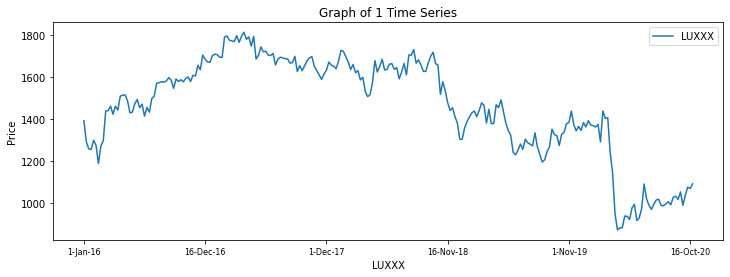

In [7]:
plot_onetime(df['LUXXX'], title='Graph of 1 Time Series', xlabel='LUXXX', ylabel='Price')

Write a Python function that graphs 2 time series on the same plot, with labels

In [8]:
def plot_twotime(Plot1, Plot2, title, color1, color2, xlabel, ylabel):
    left_data = Plot1
    right_data = Plot2
    fig, ax_left = plt.subplots(figsize=(15,5),)
    ax_right = ax_left.twinx()
    ax_left.plot(left_data, color1)
    ax_right.plot(right_data, color2)
    ax_left.set_ylabel(xlabel)
    ax_right.set_ylabel(ylabel)
    days = dates.DayLocator(interval=20)
    dfmt = dates.DateFormatter('%b %d')
    ax_left.xaxis.set_major_locator(days)
    ax_left.xaxis.set_major_formatter(dfmt)
    plt.title(title)
    for tl in ax_left.get_yticklabels():
        tl.set_color(color1)
    for tl in ax_right.get_yticklabels():
        tl.set_color(color2)
    return plt.tick_params(axis='x', labelsize=0.01)

Plotting an Example:

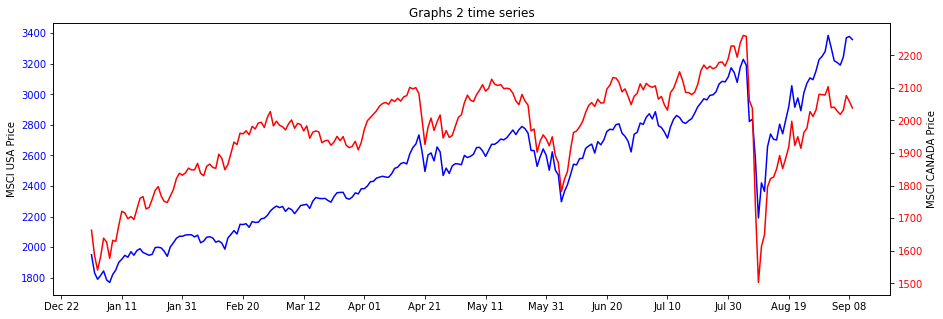

In [9]:
plot_twotime(df['MSCI USA'],df['MSCI CANADA'], title='Graphs 2 time series', color1='b', color2='r', 
             xlabel='MSCI USA Price', 
             ylabel='MSCI CANADA Price')

Write a Python function that compares the 2 return series

In [10]:
def compare_returns(return1, return2, title, color1, color2, xlabel, ylabel):
    left_data = return1.pct_change()
    right_data = return2.pct_change()
    fig, ax_left = plt.subplots(figsize=(15,5))
    ax_right = ax_left.twinx()
    ax_left.plot(left_data, color1)
    ax_right.plot(right_data, color2)
    ax_left.set_ylabel(xlabel)
    ax_right.set_ylabel(ylabel)
    days = dates.DayLocator(interval=20)
    dfmt = dates.DateFormatter('%b %d')
    ax_left.xaxis.set_major_locator(days)
    ax_left.xaxis.set_major_formatter(dfmt)
    vals = ax_left.get_yticks()
    ax_left.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    ax_right.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    plt.title(title)
    for tl in ax_left.get_yticklabels():
        tl.set_color(color1)
    for tl in ax_right.get_yticklabels():
        tl.set_color(color2)
    return plt.tick_params(axis='x', labelsize=0.01)

Plotting a Comparison:

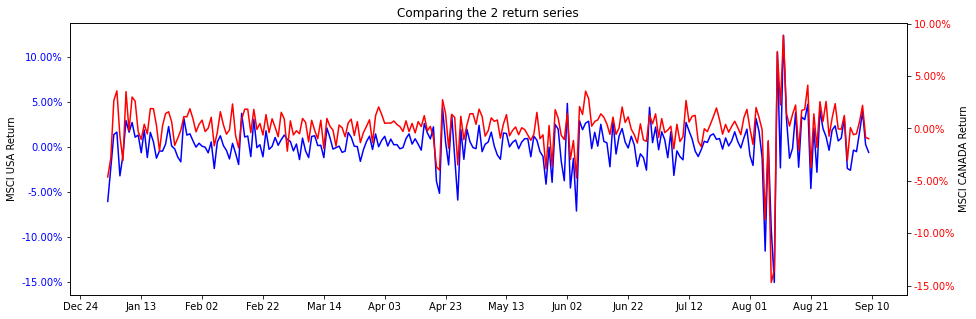

In [11]:
compare_returns(df['MSCI USA'],df['MSCI CANADA'], title='Comparing the 2 return series', color1='b', color2='r', 
             xlabel='MSCI USA Return', 
             ylabel='MSCI CANADA Return')

**2-Dimensional Data Summaries**

Compute the correlation using Pearson correlation

In [12]:
corr_pearson = df.corr(method='pearson')

We will use the heatmap to illustrate:

Text(0.5, 1.0, 'Pearson correlation matrix')

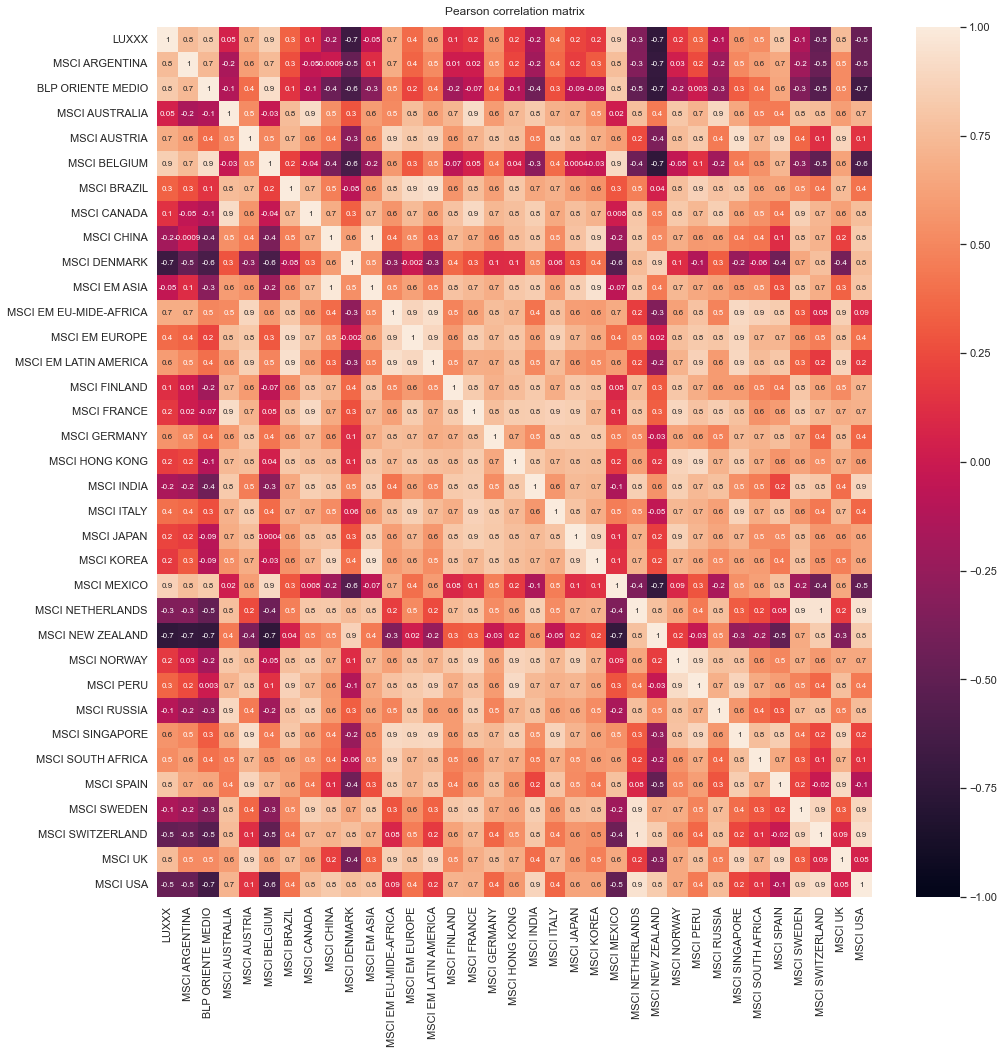

In [13]:
sns.set_theme()
annot_kws={'fontsize':8, 'fontstyle':'normal'}

f, ax = plt.subplots(figsize=(16, 16))
heatmap=sns.heatmap(corr_pearson, vmin=-1, vmax=1, annot=True, annot_kws= annot_kws, cbar=True, fmt=".1g", ax=ax) 
heatmap.set_title('Pearson correlation matrix', fontdict={'fontsize':12}, pad=12)

Recompute the calculation, instead of using Spearman correlation

In [14]:
corr_Spearman = df.corr(method='spearman')

We will use the heatmap to illustrate:

Text(0.5, 1.0, 'Pearson correlation matrix')

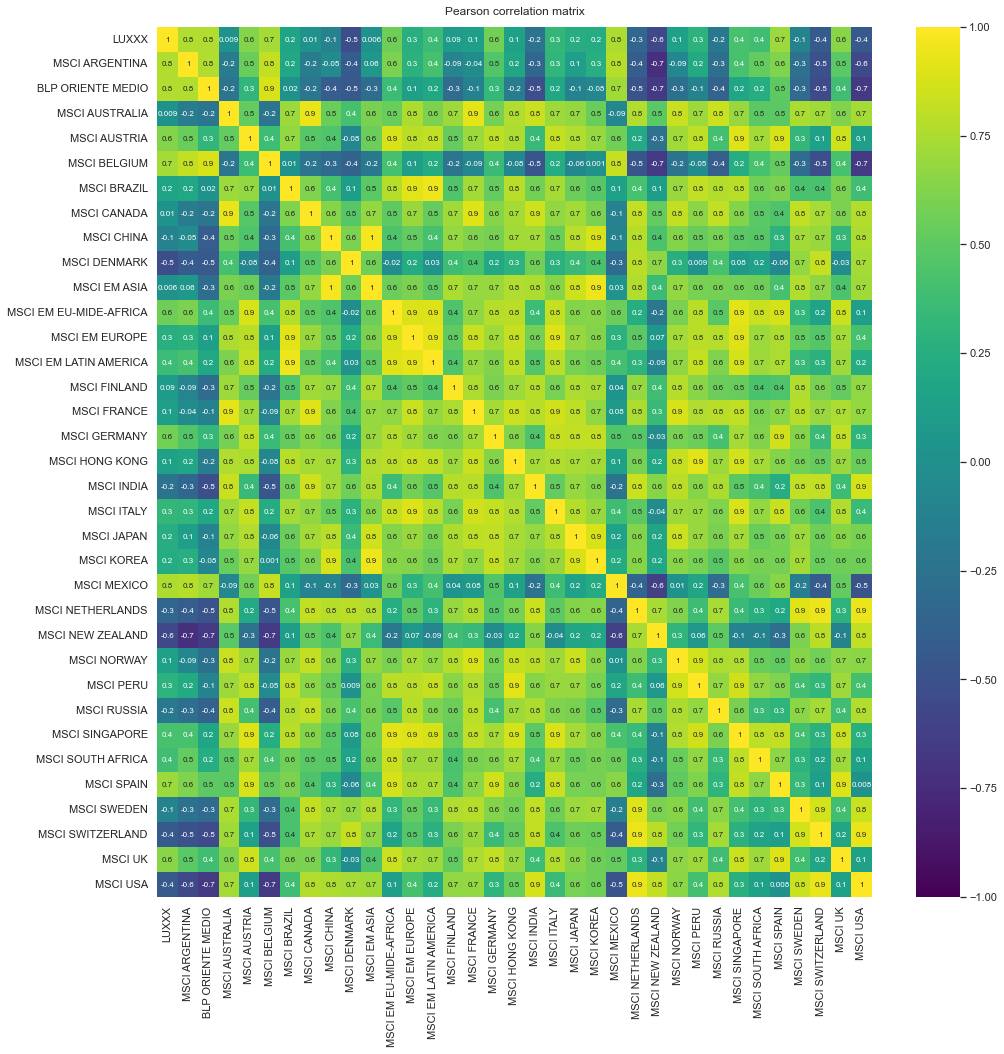

In [15]:
sns.set_theme()
annot_kws={'fontsize':8, 'fontstyle':'normal'}

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 16))
heatmap=sns.heatmap(corr_Spearman, vmin=-1, vmax=1, annot=True, annot_kws= annot_kws, cbar=True, 
                    fmt=".1g", ax=ax, cmap="viridis") 
heatmap.set_title('Pearson correlation matrix', fontdict={'fontsize':12}, pad=12)

Recompute the calculation, instead of using Kendall correlation

In [16]:
corr_kendall = df.corr(method='kendall')

We will use the heatmap to illustrate:

Text(0.5, 1.0, 'Pearson correlation matrix')

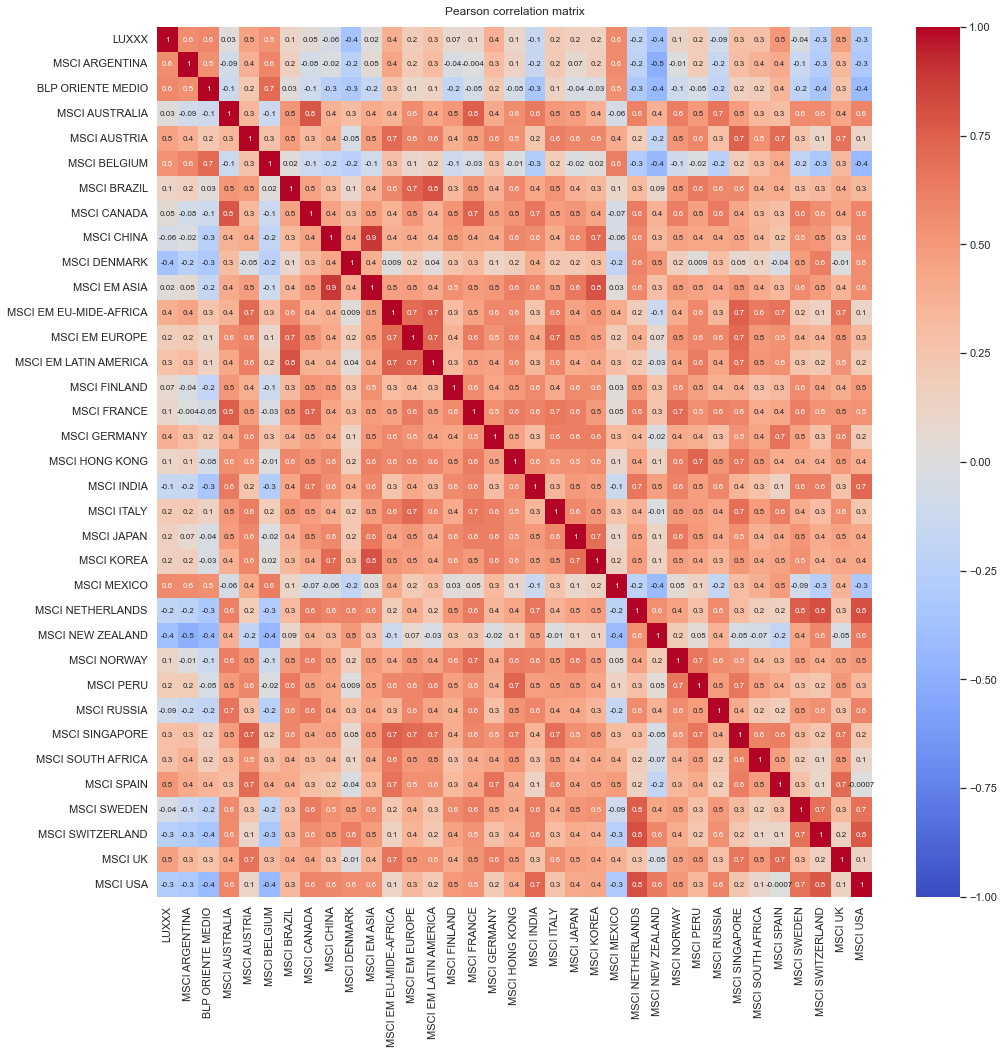

In [17]:
sns.set_theme()
annot_kws={'fontsize':8, 'fontstyle':'normal'}

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 16))
heatmap=sns.heatmap(corr_kendall, vmin=-1, vmax=1, annot=True, annot_kws= annot_kws, cbar=True, 
                    fmt=".1g", ax=ax, cmap="coolwarm") 
heatmap.set_title('Pearson correlation matrix', fontdict={'fontsize':12}, pad=12)

**Data Selection**

Choose one of the 35 variables to serve as your response variable (e.g. LUXXX)

* We choose MSCI USA as the US is a leading index.

In [18]:
X, y = df.drop('MSCI USA',axis=1), df['MSCI USA']

**Principal Component Analysis**

Use the Pearson correlation matrix

In [19]:
correlation_matrix = np.matmul(np.diag(X.std()), X.corr(method='pearson'), np.diag(X.std()))
correlation_matrix

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK
LUXXX,238.611226,180.052186,196.587261,11.189606,161.037244,202.846056,80.495566,31.863923,-45.938798,-161.422073,...,-175.360475,40.192715,83.491299,-23.755156,132.863166,125.813947,190.222266,-35.295735,-115.396836,180.117714
MSCI ARGENTINA,678.656793,899.378857,666.291663,-144.508990,543.667906,672.524847,233.952263,-42.485507,-0.824484,-427.034847,...,-641.730479,23.997977,218.370187,-203.028738,450.718404,546.429324,595.067500,-188.485067,-412.986599,465.561710
BLP ORIENTE MEDIO,425.681878,382.773945,516.678825,-64.344120,200.226710,478.135055,74.525550,-59.304809,-232.409095,-318.689965,...,-375.844709,-95.483005,1.500802,-137.211776,164.659683,207.824387,333.779490,-175.775505,-284.161212,266.752347
MSCI AUSTRALIA,4.748620,-16.270304,-12.610482,101.261295,52.311694,-2.827637,76.456556,92.767976,54.362292,28.776915,...,45.066332,82.121193,72.350842,90.600546,65.664788,46.471360,45.082047,78.535461,76.468364,61.470121
MSCI AUSTRIA,16.717720,14.973821,9.599375,12.796668,24.770889,12.262066,18.108501,13.933772,10.856554,-7.444536,...,-8.903289,18.651767,20.438385,10.838956,23.146254,17.973485,21.720248,8.804069,3.038237,21.711425
MSCI BELGIUM,10.291474,9.052479,11.202934,-0.338051,5.992719,12.106033,2.539071,-0.446096,-4.468854,-7.462068,...,-9.013340,-0.559757,1.683667,-2.437714,5.375884,6.623146,8.773349,-3.667288,-6.058218,7.598411
MSCI BRAZIL,119.754937,92.341498,51.203172,268.030116,259.509481,74.453534,354.986912,259.900867,165.340811,-29.521870,...,15.546035,272.922845,307.342027,279.190701,287.828168,221.084107,224.294622,181.691257,151.438041,266.088296
MSCI CANADA,19.163244,-6.778893,-16.471377,131.466546,80.721226,-5.287943,105.064509,143.502890,97.115069,48.201014,...,65.109759,117.684622,104.690702,121.944637,89.648704,77.647655,61.543420,122.985759,103.934652,89.478959
MSCI CHINA,-2.539924,-0.012094,-5.934231,7.082494,5.782057,-4.869970,6.144686,8.928077,13.192648,7.947159,...,6.841631,9.013888,7.628222,7.794507,5.813086,5.502963,1.513076,10.356317,9.306228,2.676908
MSCI DENMARK,-661.770245,-464.468034,-603.368889,277.994329,-293.989083,-602.965566,-81.351715,328.572121,589.271045,978.216958,...,843.620220,113.647013,-115.245743,320.863238,-230.325782,-62.469240,-416.460286,639.831738,749.324513,-392.562446


Show the amount of variation explained by the first 5 components

In [20]:
pca = PCA(n_components=5)
#pca_fit = pca.fit_transform(df)
pca_fit = pca.fit(X)

The amount of variation explained by the first 5 components as below:

In [21]:
variation_explained = pca.explained_variance_ratio_
variation_explained

array([0.51116682, 0.33325886, 0.08040066, 0.03807528, 0.01806396])

* Plot of the explained variance:

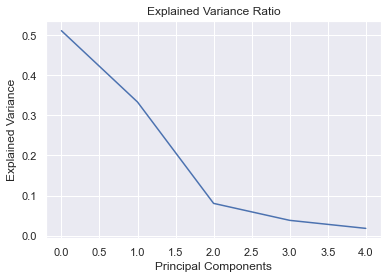

In [22]:
plt.plot(range(0, 5), variation_explained, markersize=12)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

How many components are needed to express 80% of the variation of the data?

* Two components are needed. The first two expresses 84% of the variation.

What is your interpretation of the 1st component?

* The first component explains more then 50% of the variation of the data, best accounts for the shape of the point swarm.

* It represents the maximum variance direction in the data.

In [23]:
absolute_values = np.abs(pca.components_[0])
np.where(absolute_values > 0.5)

(array([17], dtype=int64),)

In [24]:
X.columns[[17]]

Index(['MSCI HONG KONG'], dtype='object')

* It seems that MSCI USA is strongly correlated with MSCI HONG KONG.

**We will use PCA and the lasso regression**

What do these 2 methodologies have in common?

* PCA and LASSO both methods are able to accommodate correlation, such as linkage disequilibrium (LD).


* Both PCA and Lasso Regression are able to decrease the dimensionality of a dataset however they have different styles.

How do these 2 methodologies differ?

* Meanwhile PCA reducing the number of features, it doesn`t care about the class labels. The only thing that it cares about is preserving the max variance this may not always be optimal for classification task.


* In PCA the original features are used to derive the new features.


* LASSO  on the other hand pushes those features towards zero that do not have much correlation with the class labels. Hence, LASSO  strives to reduce the number of features while also getting good classification performance.


* Ordinary PCA is agnostic to the target variable while LASSO regression isn't, as it's part of a regression model.

**PCA Regression and Lasso Regression**

Run a regression of Y versus the PCA scores

* We run it for 5 components.

In [25]:
pca_scores = pca.components_
pca_matmul = np.matmul(X, pca_scores.T)
X_five = pca_matmul.iloc[:,:5]

Fitting & Predicting the model:

In [26]:
pca_reg = linear_model.LinearRegression()
pca_reg.fit(X_five, y)
Y_pred_pca = pca_reg.predict(X_five)

Evalutation:

In [27]:
print("The coefficients are:",pca_reg.coef_) 
print("The intercept is {:.2f}.".format(pca_reg.intercept_))
print("The coefficient of determinationis {:.2f}.".format(pca_reg.score(X_five, y)))
print("The mean squared error is {:.2f}.".format(mean_squared_error(Y_pred_pca, y)))
print("The R^2 score is {:.2f}.".format(r2_score(Y_pred_pca, y)))

The coefficients are: [-1.57395026e-01  1.55467899e-01  8.58694879e-05  2.30250455e-02
  1.70800242e-02]
The intercept is -640.40.
The coefficient of determinationis 0.96.
The mean squared error is 6205.56.
The R^2 score is 0.96.


Text(0.5, 1.0, 'PCA Regression model')

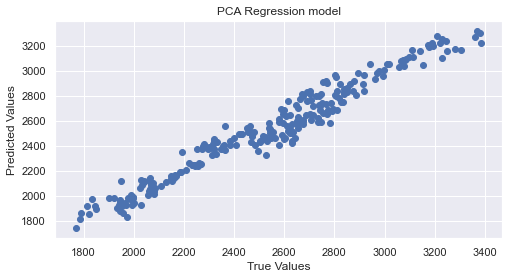

In [28]:
figure(figsize= (8, 4))
plt.scatter(y, Y_pred_pca)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('PCA Regression model')

* Seems the model is a good fit as the $R^2$ is 0.96.

**Lasso Regression**

Run a linear regression of Y versus the other predictors

Split the data into testing and training, with 2/3 for training and 1/3 for testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, random_state=42)

Fitting & Predicting the model:
   * We run a simple Lasso model with alpha = 1.

In [30]:
lasso_simple  = Lasso(alpha = 1)
lasso_simple.fit(X_train,y_train)
y_pred = lasso_simple.predict(X_test)

Evalutation:

In [31]:
print("The Lasso Regression attained an accuracy of {:.2f} with the test Dataset & for the training data is {:.2f}.".format
      (lasso_simple.score(X_test, y_test), lasso_simple.score(X_train, y_train)))

The Lasso Regression attained an accuracy of 0.98 with the test Dataset & for the training data is 1.00.


Text(0.5, 1.0, 'Lasso simple model')

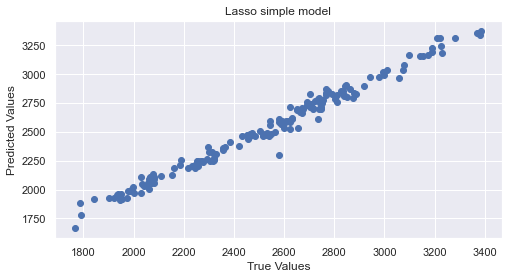

In [32]:
figure(figsize= (8, 4))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso simple model')

Calculate Mean Squared Error:

In [33]:
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared error on test set {:.2f}.".format(mean_squared_error))
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso_simple.coef_)
 
print(lasso_coeff)

Mean squared error on test set 2434.32.
                   Columns  Coefficient Estimate
0                    LUXXX              0.083778
1           MSCI ARGENTINA              0.030632
2        BLP ORIENTE MEDIO              0.023623
3           MSCI AUSTRALIA             -0.521160
4             MSCI AUSTRIA             -0.000000
5             MSCI BELGIUM             -1.488985
6              MSCI BRAZIL              0.091211
7              MSCI CANADA              0.529083
8               MSCI CHINA             -2.109349
9             MSCI DENMARK             -0.036043
10            MSCI EM ASIA              0.061091
11  MSCI EM EU-MIDE-AFRICA              2.859938
12          MSCI EM EUROPE              1.174352
13   MSCI EM LATIN AMERICA             -0.218065
14            MSCI FINLAND              5.975912
15             MSCI FRANCE              5.317242
16            MSCI GERMANY             -3.595778
17          MSCI HONG KONG              0.011134
18              MSCI INDIA   

For the lasso, use at least 1000 different values of the penalty parameter

* Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. 
* Scikit-learn uses α instead of λ in their notation.

Running & Predicting the model:

In [34]:
lasso_1K_model = Lasso()
#Coefficients for different lambda values
coefs = []
alphas = np.arange(0.01, 10.01, 0.01)
mean_squared_error = []

for a in alphas:
    lasso_1K_model.set_params(alpha = a)
    lasso_1K_model.fit(X_train,y_train)
    lasso_1K_model_pred = lasso_1K_model.predict(X_test)
    mismatch = np.mean((lasso_1K_model_pred - y_test)**2)
    mean_squared_error.append(mismatch)
    coefs.append(lasso_1K_model.coef_)

Evalutation:

In [35]:
print("The average mean squared error is {:.2f}.".format(np.mean(mean_squared_error)))
print("The R^2 score is {:.2f}.".format(r2_score(lasso_1K_model_pred,y_test)))

The average mean squared error is 2177.51.
The R^2 score is 0.99.


Text(0.5, 1.0, 'Lasso for 1000 different values model')

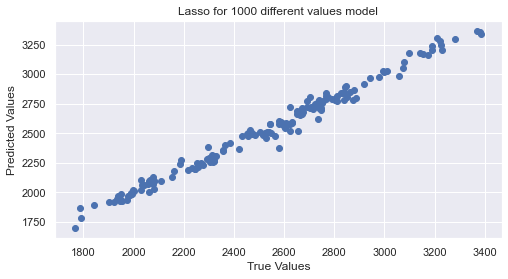

In [36]:
figure(figsize= (8, 4))
plt.scatter(y_test, lasso_1K_model_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso for 1000 different values model')

Split the data into testing and training, with 2/3 for training and 1/3 for testing

* Although, We use the train_test_split from sklearn.model_selection, which makes splitting the data easier, for this question we provide below another solution. 

In [37]:
t = 2/3
split = int(t*len(df))
train_df = df[:split]
test_df = df.drop(train_df.index)
print("The shapes for the testing and training data respectively:",train_df.shape, "&", test_df.shape)

The shapes for the testing and training data respectively: (168, 35) & (84, 35)


Graph the overall model mismatch for each of the 1000 values of the paramter

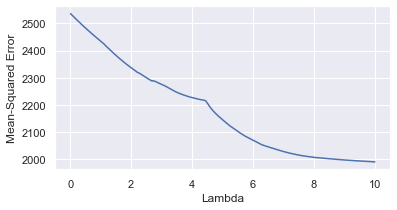

In [38]:
figure(figsize= (6, 3))
plt.plot(alphas, mean_squared_error)
plt.xlabel('Lambda')
plt.ylabel('Mean-Squared Error')
plt.show()

* We can see how the coefficients vary against the alpha values we randomly select with the graph below:

Text(0, 0.5, 'Coefficients')

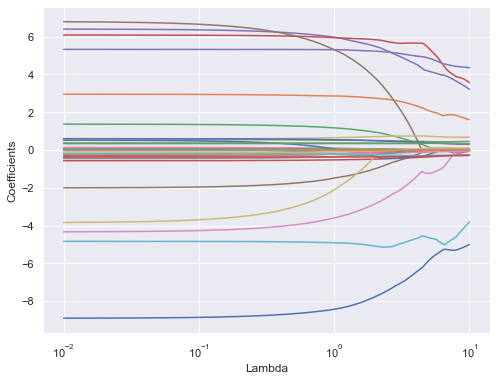

In [39]:
figure(figsize= (8, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel('Lambda')
plt.ylabel('Coefficients')

Find a lasso model that includes no more than 7 predictors

* We will do the operations using the GridSearchCV method to find the optimum lambda value.

In [40]:
lasso = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0.01, 10.01, 0.01)

In [41]:
search = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
search.fit(X_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46...
        9.37,  9.38,  9.39,  9.4 ,  9.41,  9.42,  9.43,  9.44,  9.45,
        9.46,  9.47,  9.48,  9.49,  9.5 ,  9.51,  9.52,  9.53,  9.54,
        9.55,  9.56,  9.57,  9.58,  9.59,  9.6 ,  9.61,  9.62,  9.63,
        9.64,  9.65,  9.66,  9.67,  9.68,  9.69,  9.7 ,  9.71,  9.72,
        9.73,  9.74,  9.75,  9.76,  9.77,  9.78,  9.79,  9.8 ,  9.81,
        9.82,  9.83,  9.84,  9.85,  9.86,  9.87,  9.88,  9.89,  9.9 ,
        9.91,  9.92,  9.93,  9.94,  9.95,  9.96,  9.97,  9.98,  

In [42]:
print(search.best_params_, search.best_score_)

{'alpha': 2.9099999999999997} -31.878103274215107


* We go with alpha = 2.91.

In [43]:
alpha = 2.91
model_lasso = linear_model.Lasso(alpha = alpha)
model_lasso.fit(X_train, y_train)
coefficient_lasso = model_lasso.coef_
count = (np.abs(coefficient_lasso)>0.1).sum()

* We need 7 independent variables with the highest coefficients.

In [44]:
seven_coefficients = np.argsort(np.abs(coefficient_lasso))[-7:]
X_train.columns[seven_coefficients]

Index(['MSCI FRANCE', 'MSCI EM EU-MIDE-AFRICA', 'MSCI FINLAND', 'MSCI ITALY',
       'MSCI NEW ZEALAND', 'MSCI NETHERLANDS', 'MSCI SPAIN'],
      dtype='object')

* Slicing the data:

In [45]:
X_train_seven = X_train.iloc[:, seven_coefficients]
X_test_seven = X_test.iloc[:, seven_coefficients]

* Training the model:

In [46]:
model_lasso_seven = linear_model.Lasso(alpha = alpha)
model_lasso_seven.fit(X_train_seven, y_train)

Lasso(alpha=2.91)

In [47]:
model_lasso_seven.score(X_train_seven, y_train)

0.9816317606637334

* Prediction:

In [48]:
y_pred_seven = model_lasso_seven.predict(X_test_seven)

Evalutation:

In [49]:
print("The coefficients are:", model_lasso_seven.coef_) 
print("The coefficient of determinationis {:.2f}.".format(model_lasso_seven.score(X_train_seven, y_train)))
print("The R^2 score is {:.2f}.".format(r2_score(y_pred_seven, y_test)))

The coefficients are: [ 10.27368787   3.24849908   8.85706218  -7.10361618   2.6861904
   9.27276482 -15.43778461]
The coefficient of determinationis 0.98.
The R^2 score is 0.97.


In [50]:
print("The Lasso Regression attained an accuracy of {:.2f} with the test Dataset & for the training data is {:.2f}.".format
      (model_lasso_seven.score(X_test_seven, y_test), model_lasso_seven.score(X_train_seven, y_train)))

The Lasso Regression attained an accuracy of 0.97 with the test Dataset & for the training data is 0.98.


Text(0.5, 1.0, 'Lasso for 7 predictors model')

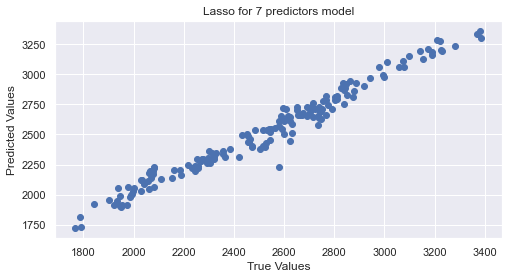

In [51]:
figure(figsize= (8, 4))
plt.scatter(y_test, y_pred_seven)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso for 7 predictors model')